# Challenge Solaire

## Imports

In [1]:
import pandas as pd
import wget as wg
import numpy as np
import datetime
import os
import sklearn as sk
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt


## Telechargement des données

In [ ]:
url = "https://gml.noaa.gov/aftp/data/radiation/surfrad/Boulder_CO/"
years = ["2019", "2020", "2021", "2022"]
days = [f'{i:03d}' for i in range(1, 366)]
for year in years:
    for day in days:
        try :
            wg.download(f"https://gml.noaa.gov/aftp/data/radiation/surfrad/Boulder_CO/{year}/tbl{year[2:]}{day}.dat")
        except Exception as e :
            print(e)

## Construire des données propres

In [ ]:
def convert(x: str) -> float:
    [value, indicator] = x.split(" ")
    if indicator == "1":
        return np.nan
    else: 
        return float(value)
    
def convert_to_nan(x: str) -> float:
    if x:
        return np.nan
    else:
        return float(x)
def get_time(df :pd.DataFrame) -> pd.Series:
    return

In [ ]:
def convert_date(year, year_day, month, day, hour, minute):
    return datetime.datetime(year, month, day, hour, minute)

In [ ]:
col_names = [ "Date", "zen", "dw_solar", "uw_solar", "direct_n", "diffuse", "dw_ir", "dw_casetemp", "dw_dometemp", "uw_ir", "uw_casetemp", "uw_dometemp", "uvb", "par", "netsolar", "netir", "totalnet", "temp", "rh", "windspd", "winddir", "pressure"]


In [ ]:
def get_clean_df(path: str):
    df = pd.read_csv(path, skiprows=2, delim_whitespace=True)     
    columns = [pd.Series([tuple(df.iloc[i, 0:6].map(lambda x : int(x))) for i in range(len(df))]).map(lambda x : convert_date(*x)), df.iloc[:,7]]
    for i in range(8, len(df.columns), 2):
        columns.append(df.iloc[:,i] + df.iloc[:,i+1].map(convert_to_nan))
    df_final = pd.concat(tuple(columns), axis=1 )
    df_final.columns = col_names
    df_final.set_index("Date", inplace=True)
    df_final.dropna(how="any", inplace=True)
    print(path)
    return df_final

In [ ]:
path = r"C:\Users\XAVIER\Documents\Data Sophia\Challenge_Solaire"
files = [ el for el in os.listdir(path) if el.split(".")[-1] == "dat"]
df = pd.concat([get_clean_df(f"{path}\\{el}")for el in files])


In [ ]:
df_final = df.dropna(how="any")
df_final = df_final.resample("3600S").mean()
df_final.index = df_final.index.map(lambda x : x - datetime.timedelta(0, 3600, 0))
df_final.to_csv("cleaned_data.csv")


## Analyse de données

In [13]:
df_cleaned = pd.read_csv("cleaned_data.csv")
df_cleaned["Date"] = df_cleaned["Date"].map(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
df_cleaned.set_index("Date", inplace=True)
df_cleaned.index = df_cleaned.index + datetime.timedelta(0, 2*3600, 0)
df_cleaned

,zen,dw_solar,uw_solar,direct_n,diffuse,dw_ir,dw_casetemp,dw_dometemp,uw_ir,uw_casetemp,...,uvb,par,netsolar,netir,totalnet,temp,rh,windspd,winddir,pressure
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 23:00:00,77.302778,191.377778,112.727778,708.177778,54.772222,177.633333,262.863333,262.321111,255.705556,263.842222,...,7.088889,95.744444,97.888889,-78.061111,19.833333,-12.594444,68.200000,1.055556,171.094444,828.511111
2019-01-02 00:00:00,90.156452,5.903226,3.051613,0.312903,6.316129,177.345161,260.598065,260.128387,229.083871,260.401935,...,0.309677,3.270968,3.264516,-51.748387,-48.487097,-14.277419,76.680645,1.464516,228.403226,828.829032
2019-01-02 01:00:00,98.297797,-0.259322,-0.781356,0.749153,0.083051,177.813559,258.309153,257.926610,227.735593,258.814915,...,0.000000,0.213559,0.083051,-49.920339,-49.837288,-16.298305,78.096610,2.223729,259.755932,828.674576
2019-01-02 02:00:00,109.042167,-1.765000,-0.915000,0.413333,0.000000,179.010000,258.119333,257.945500,225.331667,258.267333,...,0.000000,0.200000,0.000000,-46.318333,-46.318333,-15.588333,77.095000,1.236667,271.798333,829.070000
2019-01-02 03:00:00,120.309833,-0.738333,-1.053333,0.365000,0.000000,179.123333,258.309500,257.972667,226.948333,258.168500,...,0.000000,0.200000,0.000000,-47.831667,-47.831667,-16.530000,78.033333,1.891667,296.478333,829.183333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-11 12:00:00,103.696000,-1.420000,-0.971667,0.008333,0.000000,258.553333,279.427167,279.246167,339.015000,279.887833,...,0.000000,0.400000,0.000000,-80.466667,-80.466667,5.348333,86.523333,1.478333,290.255000,838.803333
2022-09-11 13:00:00,91.746739,4.454348,1.971739,76.069565,6.113043,257.515217,280.283478,280.070652,337.543478,279.669130,...,0.293478,4.893478,6.545652,-80.032609,-73.484783,6.267391,88.993478,0.934783,257.056522,838.950000
2022-09-11 14:00:00,81.029667,115.086667,31.073333,565.463333,35.511667,258.968333,281.810833,281.599333,354.326667,280.679333,...,4.923333,64.043333,98.781667,-95.351667,3.430000,8.608333,87.241667,1.348333,239.675000,839.111667


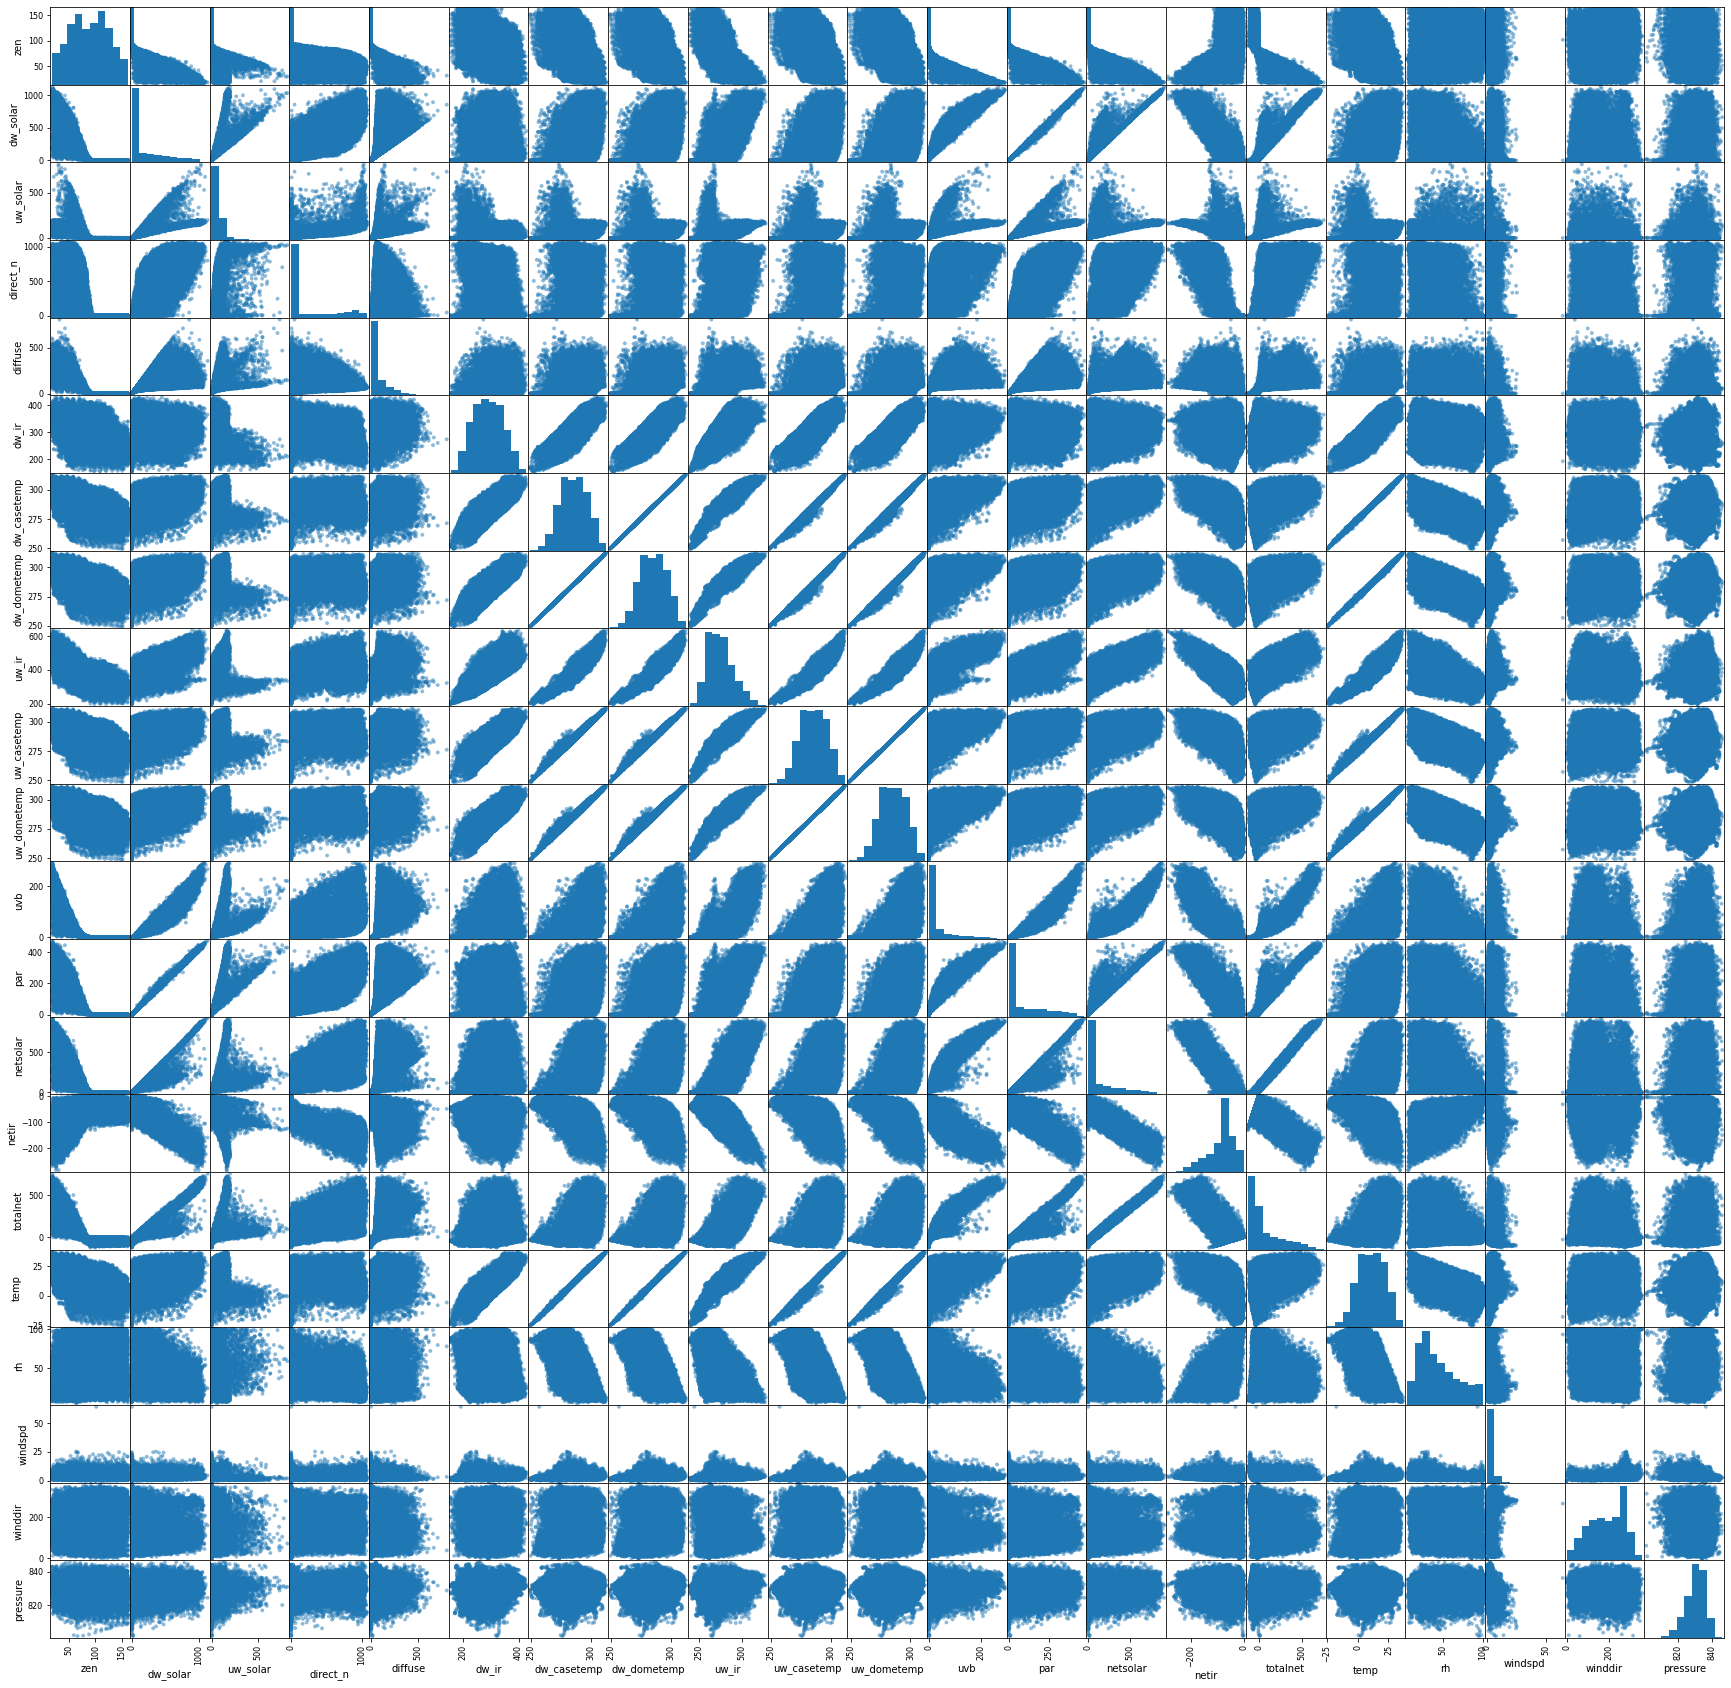

In [104]:
scatter_matrix(df_cleaned, alpha=0.5, s=60,
               figsize=(30, 30));

## Ecart au solaire

In [14]:
df_mcclear = pd.read_csv("mcclear.csv", skiprows=37, encoding="utf8", sep=";")
df_mcclear["Observation period"] = df_mcclear["Observation period"].map(lambda x : datetime.datetime.strptime(x.split("/")[-1], "%Y-%m-%dT%H:%M:%S.%f"))
df_mcclear.set_index("Observation period", inplace=True)
df_mcclear.head(30)

,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI
Observation period,,,,,
2019-01-01 01:00:00,0.0000,0.0000,0.0000,0.0000,0.0000
2019-01-01 02:00:00,0.0000,0.0000,0.0000,0.0000,0.0000
2019-01-01 03:00:00,0.0000,0.0000,0.0000,0.0000,0.0000
2019-01-01 04:00:00,0.0000,0.0000,0.0000,0.0000,0.0000
2019-01-01 05:00:00,0.0000,0.0000,0.0000,0.0000,0.0000
2019-01-01 06:00:00,0.0000,0.0000,0.0000,0.0000,0.0000
2019-01-01 07:00:00,0.0000,0.0000,0.0000,0.0000,0.0000
2019-01-01 08:00:00,0.0000,0.0000,0.0000,0.0000,0.0000
2019-01-01 09:00:00,0.0000,0.0000,0.0000,0.0000,0.0000


TOA: Irradiation on horizontal plane at the top of atmosphere (Wh/m2) computed from Solar Geometry 2

Clear sky GHI: Clear sky global irradiation on horizontal plane at ground level (Wh/m2)

Clear sky BHI: Clear sky beam irradiation on horizontal plane at ground level (Wh/m2)

Clear sky DHI: Clear sky diffuse irradiation on horizontal plane at ground level (Wh/m2)

Clear sky BNI: Clear sky beam irradiation on mobile plane following the sun at normal incidence (Wh/m2)

In [24]:
df_global = pd.concat([df_cleaned, df_mcclear], axis=1).dropna(how="any")
df_global.head(20)

,zen,dw_solar,uw_solar,direct_n,diffuse,dw_ir,dw_casetemp,dw_dometemp,uw_ir,uw_casetemp,...,temp,rh,windspd,winddir,pressure,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI
2019-01-01 23:00:00,77.302778,191.377778,112.727778,708.177778,54.772222,177.633333,262.863333,262.321111,255.705556,263.842222,...,-12.594444,68.200000,1.055556,171.094444,828.511111,263.2381,185.6836,146.7771,38.9066,768.0461
2019-01-02 00:00:00,90.156452,5.903226,3.051613,0.312903,6.316129,177.345161,260.598065,260.128387,229.083871,260.401935,...,-14.277419,76.680645,1.464516,228.403226,828.829032,54.8955,29.0668,17.9573,11.1095,238.3226
2019-01-02 01:00:00,98.297797,-0.259322,-0.781356,0.749153,0.083051,177.813559,258.309153,257.926610,227.735593,258.814915,...,-16.298305,78.096610,2.223729,259.755932,828.674576,0.0000,0.0000,0.0000,0.0000,0.0000
2019-01-02 02:00:00,109.042167,-1.765000,-0.915000,0.413333,0.000000,179.010000,258.119333,257.945500,225.331667,258.267333,...,-15.588333,77.095000,1.236667,271.798333,829.070000,0.0000,0.0000,0.0000,0.0000,0.0000
2019-01-02 03:00:00,120.309833,-0.738333,-1.053333,0.365000,0.000000,179.123333,258.309500,257.972667,226.948333,258.168500,...,-16.530000,78.033333,1.891667,296.478333,829.183333,0.0000,0.0000,0.0000,0.0000,0.0000
2019-01-02 04:00:00,131.744500,-1.570000,-1.018333,0.230000,0.000000,180.698333,258.718000,258.528333,228.933333,258.979000,...,-15.500000,75.945000,1.673333,277.006667,829.163333,0.0000,0.0000,0.0000,0.0000,0.0000
2019-01-02 05:00:00,143.001833,-1.768333,-1.291667,0.183333,0.000000,182.028333,260.216000,259.963667,232.725000,259.667333,...,-13.718333,74.246667,2.490000,242.686667,828.588333,0.0000,0.0000,0.0000,0.0000,0.0000
2019-01-02 06:00:00,153.379000,-1.353333,-1.203333,0.100000,0.000000,182.038333,260.695667,260.402167,238.618333,262.006333,...,-13.745000,70.896667,2.946667,283.710000,828.013333,0.0000,0.0000,0.0000,0.0000,0.0000
2019-01-02 07:00:00,160.896379,-2.113793,-1.210345,0.281034,0.001724,179.631034,261.530000,261.322931,228.524138,261.330862,...,-12.101724,72.129310,1.196552,217.891379,827.789655,0.0000,0.0000,0.0000,0.0000,0.0000
2019-01-02 08:00:00,161.721167,-1.146667,-1.210000,0.190000,0.000000,178.893333,261.982000,261.624500,231.176667,261.306833,...,-12.266667,73.908333,2.448333,214.005000,828.266667,0.0000,0.0000,0.0000,0.0000,0.0000


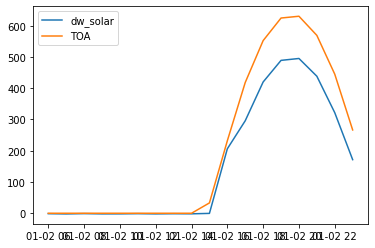

In [16]:
plt.plot(df_global.loc["2019-01-02 06:00:00":"2019-01-02 23:00:00","dw_solar"], label="dw_solar")
plt.plot(df_global.loc["2019-01-02 06:00:00":"2019-01-02 23:00:00","TOA"], label="TOA")
plt.legend()
plt.show()

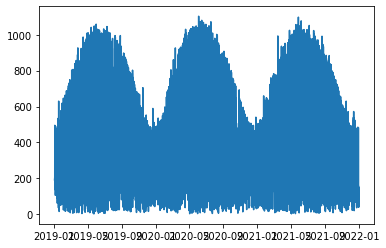

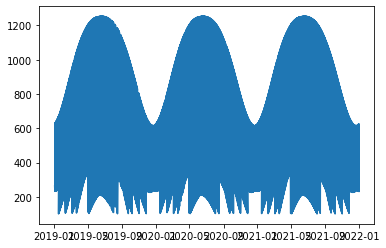

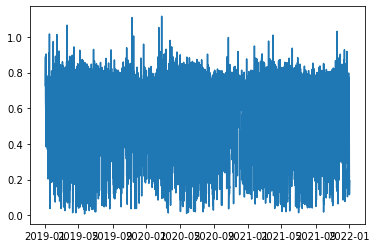

In [26]:
df_global = df_global[df_global['TOA'] >= 10]
df_global['cor_uvb'] = df_global['dw_solar']/df_global['TOA']
plt.plot(df_global['dw_solar'])
plt.show()
plt.plot(df_global['TOA'])
plt.show()
plt.plot(df_global['cor_uvb'])
plt.show()

## Création de jeu de tests/apprentissage

In [91]:
# On commence par scinder le jeu de données en 2 : un jeu de test
# et un jeu d'entraînement

df_test = df_global.loc['2021-01-01 01:00:00':][['cor_uvb']]
df_train = df_global.loc[:'2021-01-01 00:00:00'][['cor_uvb']]
df_train

,cor_uvb
2019-01-01 21:00:00,0.337950
2019-01-01 22:00:00,0.013360
2019-01-01 23:00:00,-0.000985
2019-01-02 00:00:00,-0.032152
2019-01-02 16:00:00,1.810920
...,...
2020-12-30 20:00:00,0.490080
2020-12-30 21:00:00,0.285111
2020-12-30 22:00:00,0.045650
2020-12-31 23:00:00,-0.003764


In [92]:
nrowstest = df_train.shape[0]
X_train = []
Y_train = []
for i in range(0, nrowstest - 6, 6):
    x_train = [df_train['cor_uvb'].iloc[i+k] for k in range(5)]
    y_train = df_train['cor_uvb'].iloc[i+6]

    X_train.append(x_train)
    Y_train.append(y_train)

len(X_train) == len(Y_train) == 1338


True

In [93]:
nrowstest = df_test.shape[0]
X_test = []
Y_test = []
for i in range(0, nrowstest - 6, 6):
    x_test = [df_test['cor_uvb'].iloc[i+k] for k in range(5)]
    y_test = df_test['cor_uvb'].iloc[i+6]

    X_test.append(x_test)
    Y_test.append(y_test)

len(X_test) == len(Y_test)

True

In [94]:
X_train = np.array(X_train)
X_train = pd.DataFrame(X_train)
X_train

,0,1,2,3,4
0,0.337950,0.013360,-0.000985,-0.032152,1.810920
1,0.896567,0.701855,0.510449,0.301382,0.059955
2,-0.031321,1.754944,1.134208,0.869633,0.682153
3,0.309098,0.065423,-0.001450,-0.038470,1.424657
4,0.867412,0.676773,0.497120,0.182598,0.080337
...,...,...,...,...,...
1333,-0.011391,1.721911,1.121718,0.851896,0.639611
1334,0.278082,0.043054,-0.006996,0.365509,0.280563
1335,0.055057,0.009140,-0.002399,1.322688,0.651467
1336,0.562815,0.491641,0.269891,0.052386,-0.004462


In [95]:
X_test = pd.DataFrame(np.array(X_test))
X_test

,0,1,2,3,4
0,0.954597,0.949612,0.852025,0.598229,0.345238
1,0.053833,-0.002086,-0.027020,1.784832,1.152794
2,0.652800,0.086171,0.060819,0.037909,-0.005517
3,1.728061,1.204672,0.450186,0.159092,0.099369
4,0.086093,-0.006938,-0.041432,1.765044,1.137359
...,...,...,...,...,...
697,0.883940,0.718848,0.463709,0.178993,0.038492
698,1.065840,0.908000,0.820944,0.682898,0.415268
699,0.033060,-0.004903,1.761470,1.125241,0.877162
700,0.503691,0.294762,0.038353,-0.009522,-0.047291


In [96]:
Y_train = pd.DataFrame(np.array(Y_train))
Y_train

,0
0,0.896567
1,-0.031321
2,0.309098
3,0.867412
4,-0.018495
...,...
1333,0.278082
1334,0.055057
1335,0.562815
1336,1.162415


In [97]:
Y_test = np.array(Y_test)
Y_test = pd.DataFrame(Y_test)
Y_test

,0
0,0.053833
1,0.652800
2,1.728061
3,0.086093
4,0.679799
...,...
697,1.065840
698,0.033060
699,0.503691
700,0.311887


## Prédiction

In [98]:
from sklearn import linear_model
predictor = linear_model.LinearRegression()
predictor.fit(X_train, Y_train)

LinearRegression()

In [102]:
y_pred = predictor.predict(X_test)

In [100]:
from sklearn import metrics

In [103]:
RMSE = metrics.mean_squared_error(Y_test, y_pred, squared=False)
print("RMSE: %.2f" % metrics.mean_squared_error(Y_test, y_pred, squared=False))
print(RMSE/np.mean(y_pred))

RMSE: 0.71
1.0749426787640617


## Conclusion